# <img style='float: left' src="http://lightning-viz.org/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Scatter plots in <a href='http://lightning-viz.org/'><font color='#9175f0'>Lightning</font></a>

## <hr> Configuracion

In [1]:
from lightning import Lightning

from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb

## Conexion al Servidor


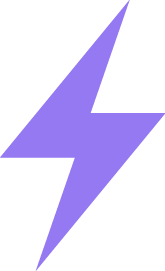

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [20]:
lgn = Lightning(ipython=True,host='http://public.lightning-viz.org')

## <hr> Puntos al azar con un estilo por defecto

In [21]:
n = 100
x = random.randn(n)
y = random.randn(n)
lgn.scatter(x, y)

## <hr> Puntos al azar púrpuras grandes

Las opciones de estilo como color y tamaño se pueden pasar a un solo valor , que afecta a todos los puntos.

In [22]:
n = 100
x = random.randn(n)
y = random.randn(n)
c = [145,117,240]
s = 18
lgn.scatter(x, y, color=c, size=s)

## <hr> Puntos al azar con todas las opciones de estilo

Las opciones de estilo también se pueden pasar como listas con un valor por punto , ya sea scalars (por alpha y size ) o arrays (por  color ) 
<br>
En este ejemplo utilizamos color_palette de Seaborn para seleccionar los colores 

In [23]:
n = 100
x = random.randn(n)
y = random.randn(n)
c = [asarray(color_palette('Blues', 100)[random.choice(range(100))])*255 for i in range(n)]
a = random.rand(n)
s = random.rand(n)*15+8
lgn.scatter(x, y, color=c, alpha=a, size=s)

## <hr> Grupos etiquetados

En lugar de especificar directamente los colores como RGB , puede especificar etiquetas (o asignaciones de grupo ) 
<br>
Aquí usamos  scikitlearn para generar clusters y luego el color de acuerdo con la etiqueta del clúster

In [24]:
d, g = datasets.make_blobs(n_features=2, n_samples=200, centers=5, cluster_std=2.0, random_state=100)
x = d[:, 0]
y = d[:, 1]
lgn.scatter(x, y, group=g, alpha=0.8, size=12)

## <hr> Color por valor

Podemos poner un color por los puntos que pasen por un valor numerico, y un mapa de colores en ColorBrewer. 

In [25]:
n = 10
x = random.randn(n)
y = random.randn(n)
v = random.rand(n)
lgn.scatter(x, y, values=v, alpha=0.6, colormap='YlOrRd')

## <hr> Diversion con colores

Podemos utilizar la geometría para definir colores en función de la posición del punto y obtener un resultado.

In [26]:
n = 200
x = random.randn(n)
y = random.randn(n)
r = map(lambda (x, y): sqrt(x ** 2 + y ** 2), zip(x,y))
t = map(lambda (x, y): arctan2(x, y), zip(x,y))
c = map(lambda (r, t): asarray(hsv_to_rgb(t / (2 * pi), r, 0.9))*255, zip(r, t))
s = asarray(r) * 10 + 2
lgn.scatter(x, y, color=c, size=s, alpha=0.6)

## Etiquetas Axis 

Podemos añadir etiquetas de los ejes , proporcionando argumentos extra.

In [27]:
x = random.randn(100)
y = random.randn(100)

lgn.scatter(x, y, xaxis='my axis label 1', yaxis='my axis label 2')

## Ejemplo Scatter con datos extraidos de una base de datos

In [28]:
import psycopg2, psycopg2.extras
try:
    conn = psycopg2.connect("dbname='gp' user='roma' host='localhost' password='roma'")
except:
    print "I am unable to connect to the database"
cur = conn.cursor()

In [29]:
cur.execute("""SELECT cantidad,nomempresa from empresasgrupoconsumo inner join empresas on empresasgrupoconsumo.idempresa=empresas.idempresa where anio=2004 and idgrupoconsumo=1 """)
rows = cur.fetchall()
i=1
x=[]
y=[]
for row in rows:
    x.append(i)
    i=i+1
    y.append(int(row[0]))

# Visualizacion de la cantidad de Energia generada para el Alumbrado Publico  de cada una de las 34 Empresas 
<br>
El eje X nos muestra los Id de cada una de las empresas y el eje Y nos muestra la cantidad de energia generada en GW de cada una de las empresas , ademas hemos puesto que los valores mas altos se tiñan de un color mas opaco mientras que los valores mas bajos de un color mas claro para identificar con mas facilidad los puntos mas altos

In [38]:

lgn.scatter(x, y, values=y , alpha=100,colormap='YlOrRd', xaxis='ID Empresa Electrica', yaxis='Produccion GW')